# Denoising autoencoders

Image noise is defined as a random varitions of brightness in an image. Image noise may origante from the sensors of digital cameras.

Denoising images has been a challenge for researchers for many years. A few years ago, researchers discovered that we can train autoencoders for image denosing.

Instead of using the same input and output when training conventional autoencoders, we use a noisy image as the input and a clean reference image for the autoencoder to compere its output against.

![diagram](https://i.imgur.com/hmOlU6j.png)

During the training process, the autoencoder will learn that the noises in the image should not be part of the output, and will learn to output a clean image.

-----

Let's start by introducing noise to the MNIST dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from keras.datasets import mnist

In [2]:
training_set, testing_set = mnist.load_data()
X_train, y_train = training_set
X_test, y_test = testing_set

In [3]:
X_train_reshaped = X_train.reshape(
    (X_train.shape[0],
     X_train.shape[1]*X_train.shape[2])
    )

X_test_reshaped = X_test.reshape(
    (X_test.shape[0],
     X_test.shape[1]*X_test.shape[2])
    )

In [4]:
X_train_noisy = X_train_reshaped + np.random.normal(0,0.5,size=X_train_reshaped.shape)
X_test_noisy = X_test_reshaped + np.random.normal(0,0.5,size=X_test_reshaped.shape)

In [ ]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(X_test_reshaped.shape[0]),5)

# 1st row for original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28),
              cmap='gray')
    if i == 0:
        ax.set_ylabel("Original \n Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 2nd row for input with noise added
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28),
              cmap='gray')
    if i == 0:
        ax.set_ylabel("Input With \n Noise Added", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

We clip the noisy images between 0 and 1 to normalize the images

In [5]:
X_train_noisy = np.clip(X_train_noisy, a_min=0, a_max=1)
X_test_noisy = np.clip(X_test_noisy, a_min=0, a_max=1)

The basic autoencoder has a single hidden layer with 16 nodes

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model = Sequential()

In [24]:
model.add(Dense(units=64,
                input_shape=(784,),
                activation='relu'))

In [25]:
model.add(Dense(
    units=784,
    activation='sigmoid'
))

In [29]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train_noisy,X_train_reshaped,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 7217.0762
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 7217.0771
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 7217.0737
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 7217.0718
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 7217.0693
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 7217.0815
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 7217.0771
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 7217.0757
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 7217.0806
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 7217.0718


In [32]:
output = model.predict(X_test_noisy)

313/313 [==============================] - 1s 3ms/step


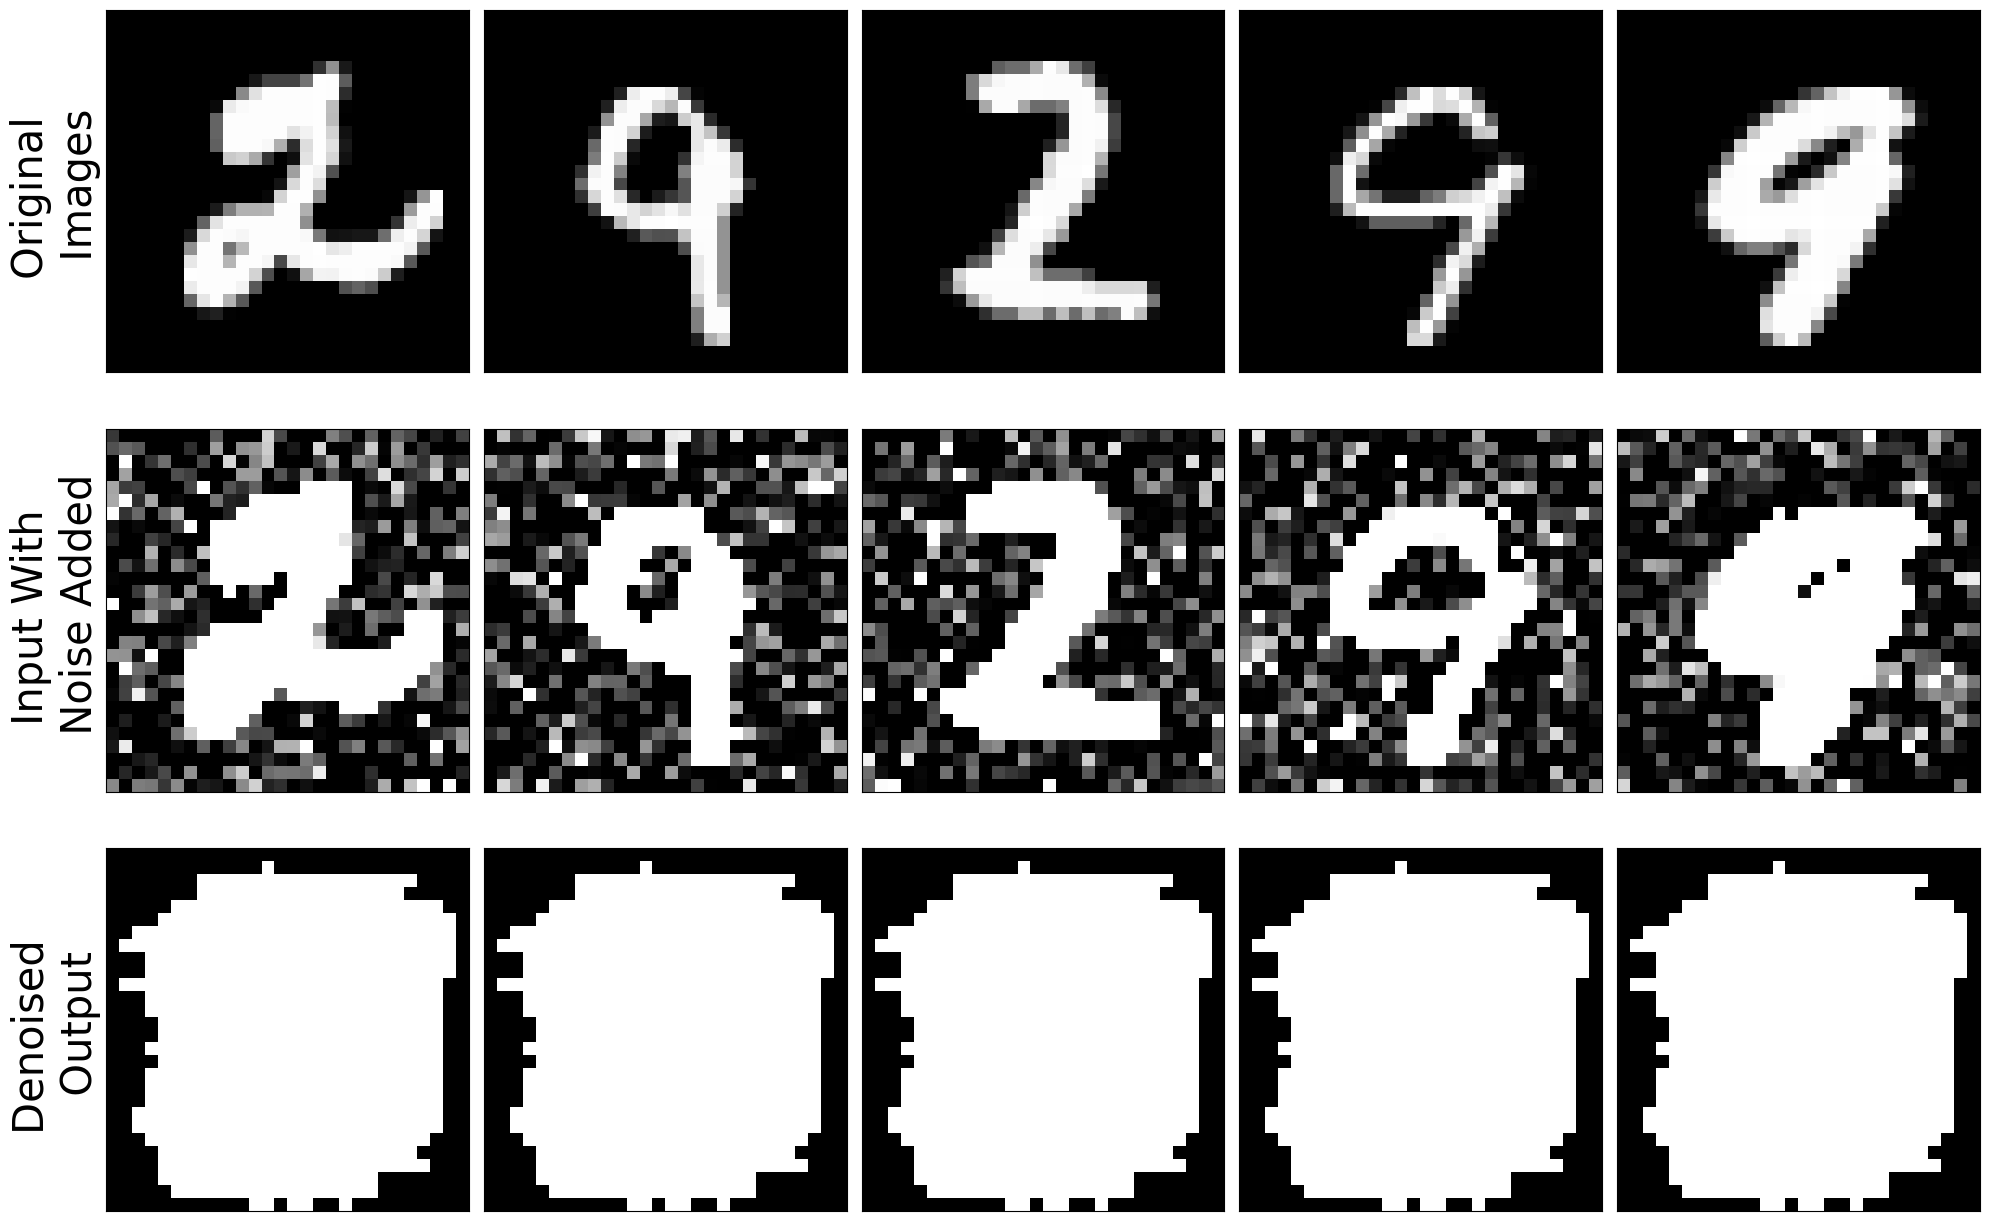

In [33]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

# 1st row for original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28),
              cmap='gray')
    if i == 0:
        ax.set_ylabel("Original \n Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 2nd row for input with noise added
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28),
              cmap='gray')
    if i == 0:
        ax.set_ylabel("Input With \n Noise Added", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

    # 3rd row for output images from our autoencoder
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28),
              cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoised \n Output", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

-----

# Deep convolutional denoising autoencoder

The following diagram illustrates the architecture of a deep convolutional autoencoder:

![diagram](https://i.imgur.com/402v72f.png)

Constructing a deep convolutional in Keras. As follows:

In [7]:
conv_autoencoder = Sequential()

Let's add the first two convolutional layers, which act as the encoder in our model. There are sereval parameters we need to define while using the Conv2D class in Keras:

- **Number of filters** Let's use 16 filters for the first convolutional layer in the encoder and eight filters for the second convolutional layer in the encoder. Conversely, let's use eight filters for the firts convolutoional layer in the decoder and 16 filters for the second convolutional layer in the decoder
- **Filter size** A filter size of 3x3 is typical for convolutional layers
- **Padding** For autoencoders, we use a same padding. This is useful because we need to ensure that the dimensiones of the final output is the same as the input


In [8]:
from keras.layers import Conv2D

In [9]:
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1)))

conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))

We'll add the decoder layers onto our model. Just like the encoders layers, the decoder layers are also convolutional layers. The only difference is that, in the decoder layers we use an increasing number of filters after each succesive layer

In [10]:
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))

We add the output layer to our model. The output layer should be a convolutional layer with only filter, as we atre trying to output a $28\times 28\times 1$ image. The sigmoid function is used as the activation function for the output layer

In [11]:
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [12]:
conv_autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 8)         1160      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         584       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 1)         145       
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


We define the training process under the compile function and call the fit function

In [13]:
conv_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
conv_autoencoder.fit(X_train_reshaped.reshape(60000,28,28,1), X_train_reshaped.reshape(60000,28,28,1),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 186s 99ms/step - loss: 7216.5845
Epoch 2/10
1875/1875 [==============================] - 177s 95ms/step - loss: 7216.5264
Epoch 3/10
1875/1875 [==============================] - 189s 101ms/step - loss: 7216.5137
Epoch 4/10
1875/1875 [==============================] - 180s 96ms/step - loss: 7216.5264
Epoch 5/10
1875/1875 [==============================] - 184s 98ms/step - loss: 7216.5161
Epoch 6/10
1875/1875 [==============================] - 180s 96ms/step - loss: 7216.5234
Epoch 7/10
1875/1875 [==============================] - 178s 95ms/step - loss: 7216.5171
Epoch 8/10
1875/1875 [==============================] - 180s 96ms/step - loss: 7216.5171
Epoch 9/10
1875/1875 [==============================] - 178s 95ms/step - loss: 7216.5200
Epoch 10/10
1875/1875 [==============================] - 180s 96ms/step - loss: 7216.5205


In [15]:
output = conv_autoencoder.predict(X_test_noisy.reshape(10000,28,28,1))

313/313 [==============================] - 7s 22ms/step


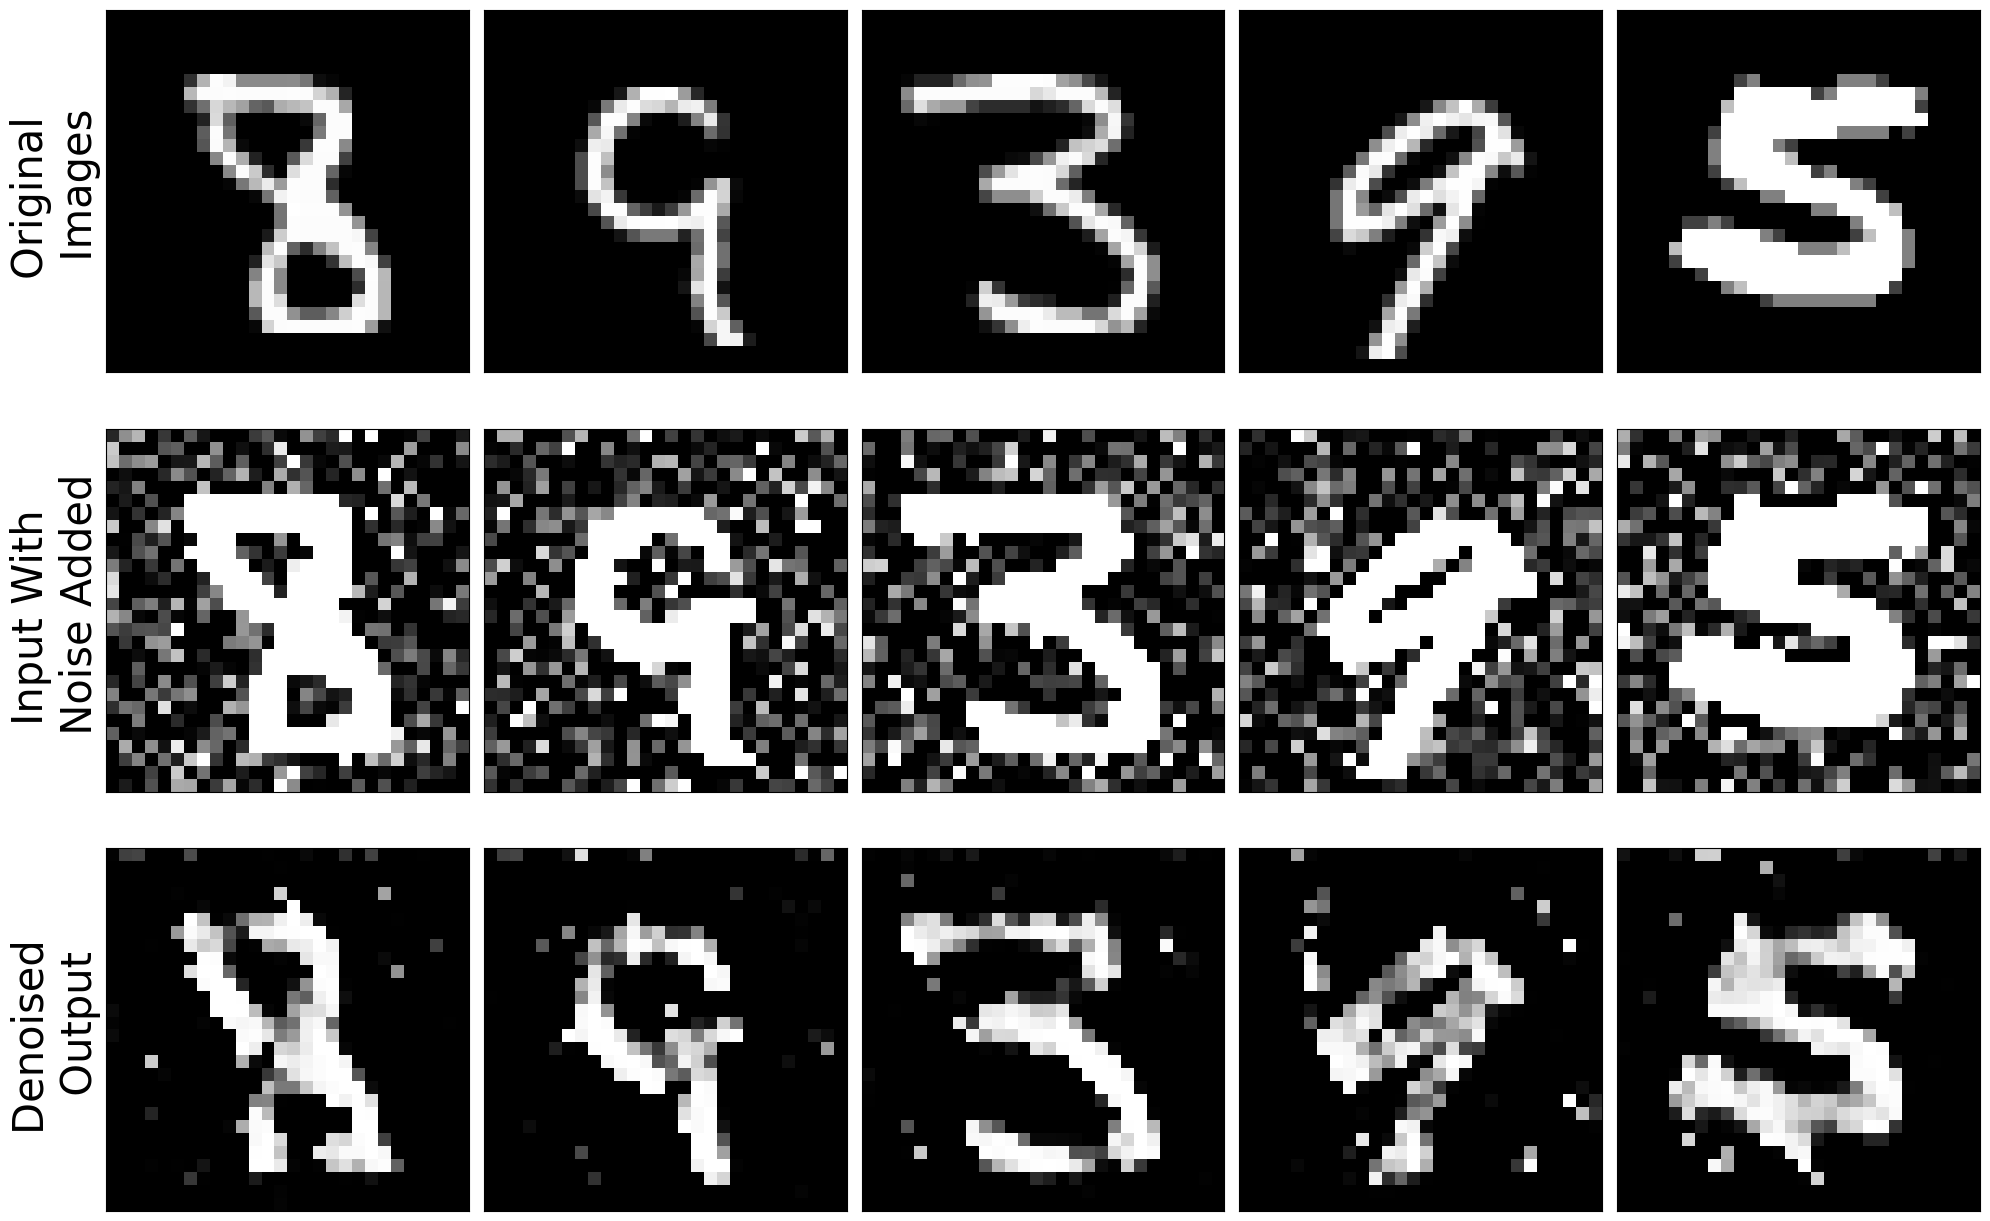

In [22]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]),5)
# 1st row for original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(X_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Original \n Images", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 2nd row for input with noise added
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(X_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Input With \n Noise Added", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

# 3rd row for output images from our autoencoder
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoised \n Output", size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import GridSearchCV

# Define los hiperparámetros a probar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'batch_size': [32, 64, 128],
    'epochs': [10, 20, 30],
    'hidden_layers': [1, 2, 3],
    'neurons_per_layer': [64, 128, 256],
}

# Crea tu modelo de red neuronal


# Realiza la búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(conv_autoencoder, param_grid, cv=3)
grid_search.fit(X_train_noisy.reshape(60000,28,28),X_train_reshaped.reshape(60000,28,28))

# Muestra los mejores hiperparámetros y puntajes de validación
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntaje de validación:", grid_search.best_score_)

TypeError: ignored